# **Task 1**

1. Image Resizing:  
a. Linear

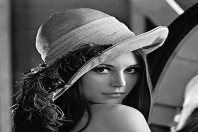

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('sample_data/Picture1.jpg')
new_width = int(image.shape[1] * 0.5)  # Scale width by 50%
new_height = int(image.shape[0] * 0.5)  # Scale height by 50%
resized_image_linear = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
cv2_imshow(resized_image_linear)


b. Nearest Neighbors


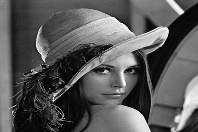

In [ ]:
resized_image_nearest = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
cv2_imshow(resized_image_nearest)


c. Polynomial

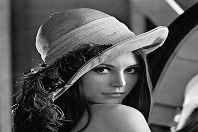

In [ ]:
resized_image_polynomial = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
cv2_imshow(resized_image_polynomial)

2.	Image blurring  
a. Box blurring


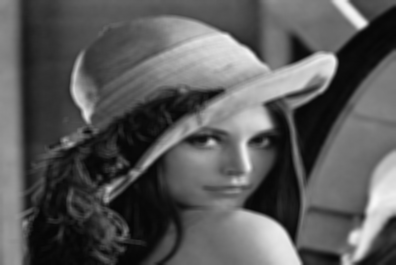

In [ ]:
kernel = np.ones((5, 5), np.float32) / 25  # 5x5 kernel
blurred_image_box = cv2.filter2D(image, -1, kernel)
cv2_imshow(blurred_image_box)

b.	Gaussian blurring

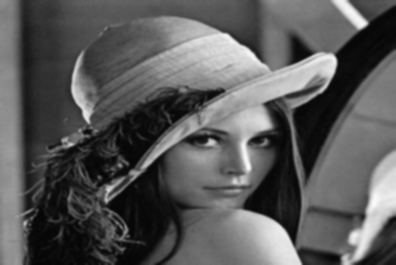

In [ ]:
blurred_image_gaussian = cv2.GaussianBlur(image, (5, 5), 0)
cv2_imshow(blurred_image_gaussian)

c. Adaptive blurring

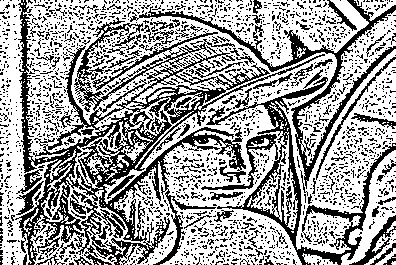

In [ ]:
blurred_image_adaptive = cv2.adaptiveThreshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
cv2_imshow(blurred_image_adaptive)

# **Task-2: - Apply Machine Learning Algorithm and find the model accuracy based on K fold Cross Validation with (80-20 train-test split).**


Naive Bayes Results:
Accuracy: 0.5508
Precision: 0.6686
Recall: 0.5508
F1-Score: 0.5044
Confusion Matrix:
 [[5113   10   33   21    9   12  140    2  121   99]
 [   3 5900   19   24    4   10   83    1  148   85]
 [ 610  156 1657  389   18   17 1468   20 1177   98]
 [ 534  305   53 2067   10    7  320   49 1718  645]
 [ 229   40   44   38  699   38  601   32 1092 2716]
 [ 761  141   25  111   19  195  309   12 2889  578]
 [  67   99   32    3    3   21 5145    0  103    7]
 [  30   48   11   59   44    7   21 1651  188 3731]
 [ 108  781   29   47   12   40  116   10 3177 1148]
 [  39   42   14   10   28    6    4   69   86 5240]]


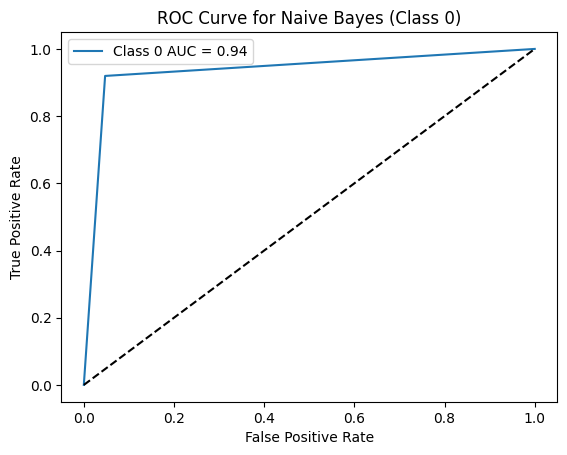

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1).astype(np.float32) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1).astype(np.float32) / 255.0
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes model
model = GaussianNB()

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred = []
y_true = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    model.fit(X_fold_train, y_fold_train)
    y_pred_fold = model.predict(X_fold_val)
    y_pred.extend(y_pred_fold)
    y_true.extend(y_fold_val)

# Metrics Calculation
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")
cm = confusion_matrix(y_true, y_pred)

print("\nNaive Bayes Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:\n", cm)

# ROC and AUC
y_true_binarized = label_binarize(y_true, classes=np.unique(y))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y))
fpr, tpr, roc_auc = {}, {}, {}

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC for Class 0
plt.figure()
plt.plot(fpr[0], tpr[0], label=f"Class 0 AUC = {roc_auc[0]:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive Bayes (Class 0)")
plt.legend(loc="best")
plt.show()



Random Forest Results:
Accuracy: 0.9672
Precision: 0.9672
Recall: 0.9672
F1-Score: 0.9672
Confusion Matrix:
 [[5482    1    4    2    3    7   24    2   32    3]
 [   1 6186   35    8   12    6    8    8    9    4]
 [  24    8 5434   30   26    4   14   34   31    5]
 [   5    6   70 5454    1   51    5   40   51   25]
 [  11    9    5    2 5359    0   33    9   13   88]
 [  21    6    7   66    9 4831   42    6   29   23]
 [  25   12    5    0    9   33 5376    0   20    0]
 [   4   19   56    6   31    0    0 5598    6   70]
 [  12   29   30   46   25   41   26    2 5193   64]
 [  21   10   15   67   72   19    3   47   33 5251]]


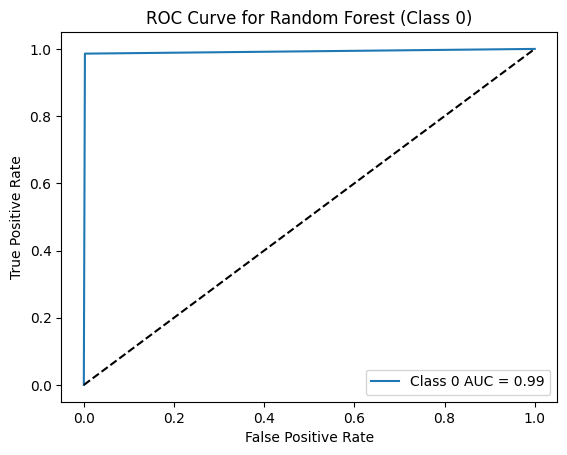

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1).astype(np.float32) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1).astype(np.float32) / 255.0
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred = []
y_true = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    model.fit(X_fold_train, y_fold_train)
    y_pred_fold = model.predict(X_fold_val)
    y_pred.extend(y_pred_fold)
    y_true.extend(y_fold_val)

# Metrics Calculation
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")
cm = confusion_matrix(y_true, y_pred)

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:\n", cm)

# ROC and AUC
y_true_binarized = label_binarize(y_true, classes=np.unique(y))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y))
fpr, tpr, roc_auc = {}, {}, {}

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC for Class 0
plt.figure()
plt.plot(fpr[0], tpr[0], label=f"Class 0 AUC = {roc_auc[0]:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest (Class 0)")
plt.legend(loc="best")
plt.show()
